<a href="https://colab.research.google.com/github/aninhaborges/atividade_analise/blob/main/parte_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

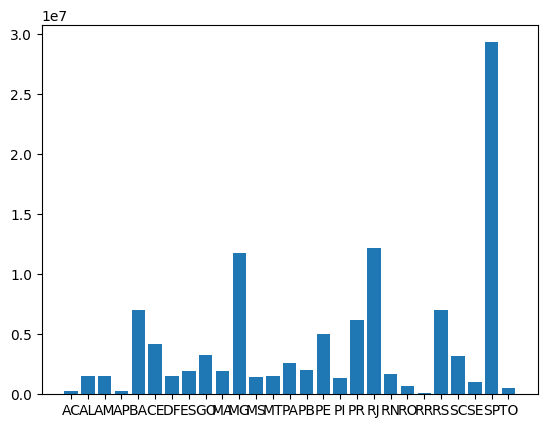

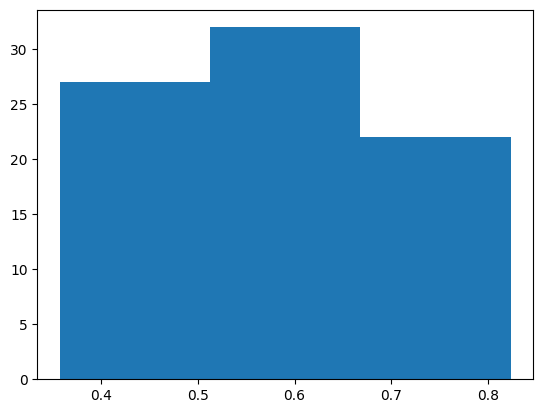

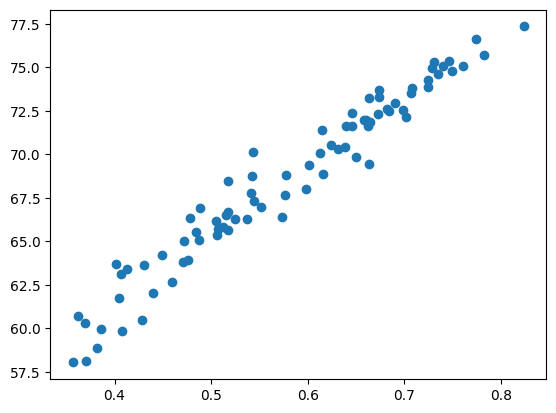

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('Dataset_Processo_Seletivo_UFRJ_Analytica_2022.1.csv')

#Proporção da população entre os estados
filtro=df[df['ano']==1991]
def UF(filtro):
  'Retorna uma lista com as UFs de 1991 dentro'
  lista=[]
  for linha in filtro.iloc[:,1]:
    lista.append(linha)
  return lista

def pop_urbana(filtro):
  'Retorna uma lista com a população urbana de cada UF em 1991, dentro'
  lista=[]
  for linha in filtro.iloc[:,3]:
    lista.append(linha)
  return lista

ufs=UF(filtro)
pop_urbana=pop_urbana(filtro)
estados=np.array(ufs)
populacao=np.array(pop_urbana)
plt.bar(estados,populacao)
plt.show()

def mostra_anos(df):
  lista=[]
  for ano in df.iloc[:,0]:
    if ano not in lista:
      lista.append(ano)
  return lista

#Nível de desigualdade do Brasil
def idh_ano(df):
  'Retorna uma lista com o idh de cada estado naquele ano'
  lista=[]
  for ano in mostra_anos(df):
    filtro=df[df['ano']==ano]
    for idh in filtro.iloc[:,5]:
      lista.append(idh)
  return lista

i=idh_ano(df)
plt.hist(i,len(mostra_anos(df)))
plt.show()


#Relação entre IDH e Expectativa de vida
expec=np.array([df.iloc[:,2]])
IDHs=np.array([df.iloc[:,5]])
plt.scatter(IDHs,expec)
plt.show()





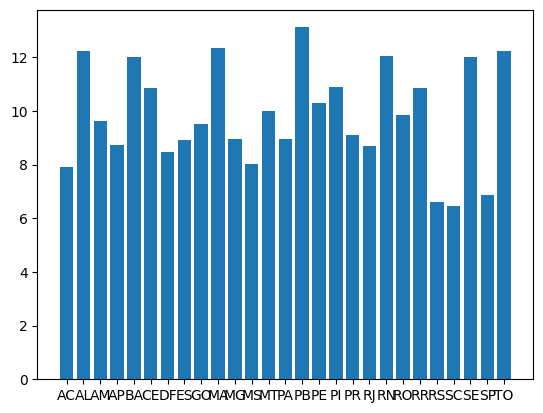

Estados que tiveram um aumento de pelo menos 10 anos na expectativa de vida entre 1991 e 2010:
['AL', 'BA', 'CE', 'MA', 'MT', 'PB', 'PE', 'PI', 'RN', 'RR', 'SE', 'TO']


In [ ]:
from os import listxattr
"DESAFIO FINAL"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('Dataset_Processo_Seletivo_UFRJ_Analytica_2022.1.csv')

#faz uma lista com todas as siglas UF
def siglas(df):
  'Retorna uma lista com todas as siglas UF'
  lista=[]
  for sigla in df.iloc[:,1]:
    if sigla not in lista:
      lista.append(sigla)
  return lista

#agora, calcula a diferença das expectativas de vida de 1991 e 2010
def expectativas(df):
  'Retorna duas listas com as expectativas de vida'
  filtro1=df[df['ano']==1991]
  filtro2=df[df['ano']==2010]
  filtro3=df['expectativa_vida']
  df_filtrado1=df[(df['ano']==1991) & (df['expectativa_vida'])]
  df_filtrado2=df[(df['ano']==2010) & (df['expectativa_vida'])]
  lista1991=[]
  lista2010=[]
  for exp1991 in df_filtrado1.iloc[:,2]:
    lista1991.append(exp1991)
  for exp2010 in df_filtrado2.iloc[:,2]:
    lista2010.append(exp2010)
  return [lista1991,lista2010]

expectativas=expectativas(df)

#agora farei a diferença entre a expectativa de vida de cada estado entre 1991 e 2010
def diferenca(expectativas):
  "Calcula a a variação das expectativas de vida de cada estado entre 1991 e 2010"
  variacao=[]
  for j in range(len(expectativas[0])):
    variacao.append(expectativas[1][j]-expectativas[0][j])
  return variacao

variacao=diferenca(expectativas)
#criação do gráfico de barras
estado=np.array(siglas(df))
variacao_exp=np.array(diferenca(expectativas))
plt.bar(estado,variacao_exp)
plt.show()

#estados que tiveram um aumento de pelo menos 10 anos
def aumentaram(variacao):
  "Retorna os estados que tiveram um aumento de pelo menos 10 anos na expectativa de vida entre 1991 e 2010"
  uf=[]
  for i in range(len(variacao)):
    if variacao[i]>=10:
      uf.append(siglas(df)[i])
  print('Estados que tiveram um aumento de pelo menos 10 anos na expectativa de vida entre 1991 e 2010:')
  return uf
print(aumentaram(variacao))

